In [1]:
from skimage import io
from matplotlib import pyplot as plt
from utils import fractal_dimension, benford
import cv2 as cv
import numpy as np

In [2]:
# Benford Histogram calculation
p = 3
x = [i for i in range(1, 10)]
hist_bl = [benford(i) for i in x]
dMax = np.power(1 - hist_bl[0], p) + np.sum(np.power(hist_bl[1::], p))

In [5]:
def createPlots(image_paths):
    colors = ['red', 'green', 'blue']
    labels = ['A', 'B', 'C']
    
    plt.figure(figsize=(25, 5))
    for i, image_path in enumerate(image_paths):
        # Image
        image = io.imread(image_path)
        plt.subplot(1, 5, 1 + i)
        plt.imshow(image)
        plt.title(labels[i], fontsize=28)
        plt.axis('off')
        
    for i, image_path in enumerate(image_paths):
        color = colors[i]
        label = labels[i]
        
        # Benford
        img_gen = cv.imread(image_path)
        img_gen = cv.cvtColor(img_gen, cv.COLOR_BGR2GRAY)
        hist_gen = cv.calcHist([img_gen], [0], None, [10], [0, 256])
        hist_gen = (np.array(hist_gen) / np.sum(hist_gen))
        hist_gen_percent = np.array(hist_gen) * 100
        
        values = []
        for v in hist_gen_percent:
            values.append(v[0])
        values.pop(5)
        
        dTotal = np.sum(np.power(hist_gen - hist_bl, p))
        
        bl = (dMax - dTotal) / dMax
        label = f'{label}: {bl}'
        plt.subplot(1, 5, 4)
        plt.title('$M_{bl}$', fontsize=28)
        plt.bar(np.array(x) + (0.33 * (i - 1)), np.array(values), color=color, alpha=0.7, width=0.3, label=label, align="center")
        plt.xticks(np.arange(1, 10, step=1))
        plt.xlabel('Digit', fontsize=28)
        plt.ylabel('%', fontsize=28)
        plt.legend(loc='upper right', fontsize=12)
        plt.axis('on')
        
    for i, image_path in enumerate(image_paths):
        color = colors[i]
        label = labels[i]
        
        # Fractal dimension
        image = io.imread(image_path)
        
        # Set the threshold value (adjust as needed)
        threshold_value = 0.9
        
        # Calculate the fractal dimension
        fractal_dim, sizes, counts = fractal_dimension(image, threshold=threshold_value)
        
        mfd = 1 - abs(1.35 - fractal_dim)
        label = f'{label}: {mfd}'
        plt.subplot(1, 5, 5)
        plt.loglog(sizes, counts, marker='o', linestyle='-', alpha=0.7, color=color, label=label)
        plt.title('$M_{fd}$', fontsize=28)
        plt.xlabel('Box Size (log scale)', fontsize=28)
        plt.ylabel('Number of Boxes (log scale)', fontsize=20)
        plt.legend(loc='upper right', fontsize=12)
        plt.axis('on')
    
    plt.tight_layout()
    plt.show()

# Images 94, 31, 192, narodziny, zulu

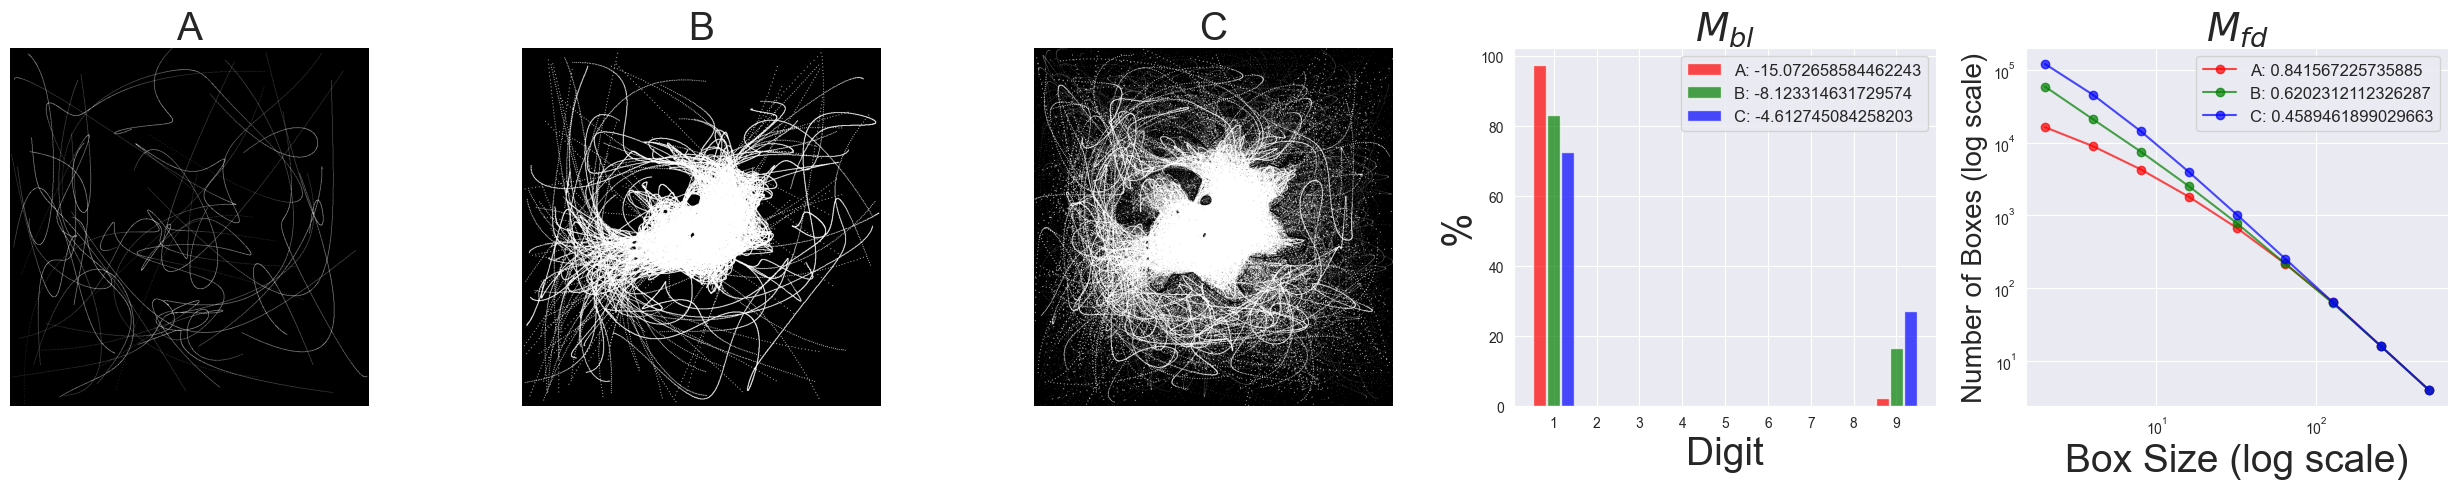

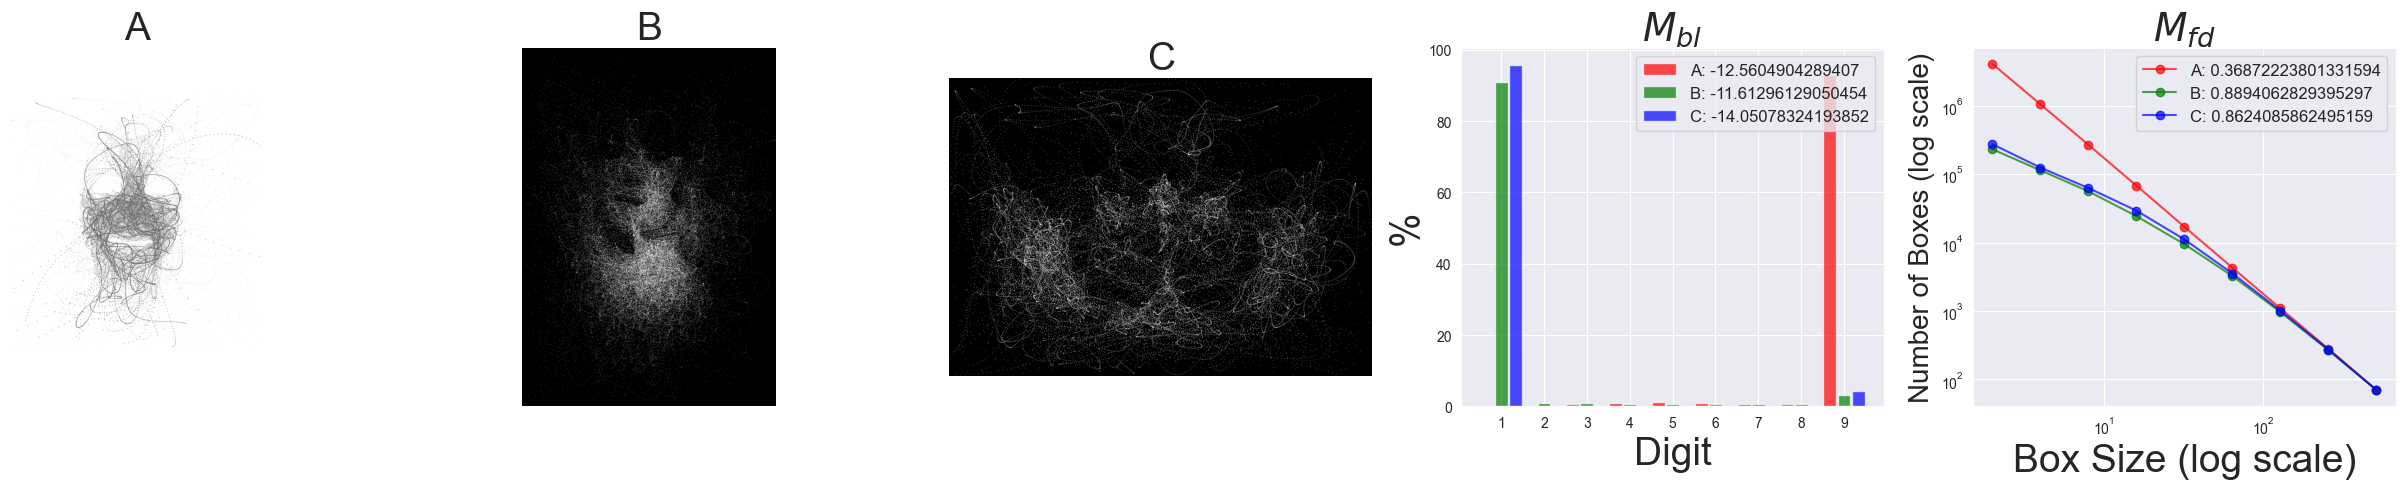

In [4]:
createPlots(["./random-tries/94.png", "./random-tries/31.png", "./random-tries/192.png"])
createPlots(["./images/zulu/gen.png", "./images/narodziny/gen.png", "./images/paz/gen.png"])